Average Heart Rate: 92.98 BPM
ECG Status: Good ECG


<Figure size 640x480 with 0 Axes>

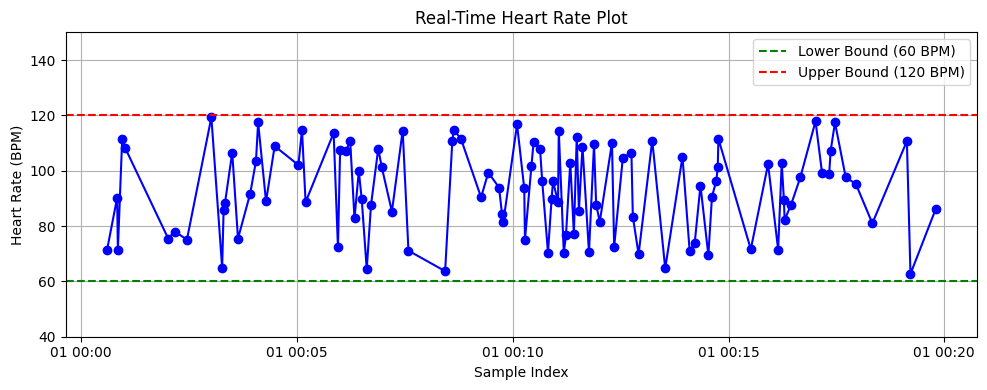

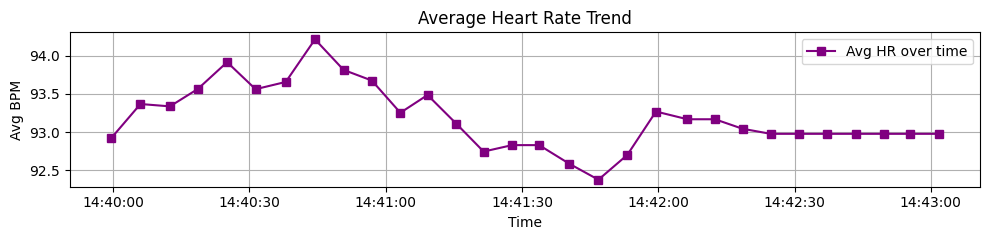

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from IPython.display import clear_output

plt.ion()  # Enable interactive plotting

avg_hr_list = []  # List to store average heart rates
time_stamps = []

while True:
    clear_output(wait=True)  # Clear previous output

    # Google Sheets URL
    sheet_url = "YOUR SHEET URL"

    # Convert to CSV export link
    csv_url = sheet_url.replace("/edit?usp=sharing", "/export?format=csv")

    # Load the CSV into a DataFrame
    df = pd.read_csv(csv_url)

    # Process heart rate data
    df['Value'] = df['Value'].astype(str)
    df['Heartbeat_Timestamp'] = df['Value'].str.extract(r"^([0-9]+(?:\.[0-9]+)?)")[0].astype(float)
    df = df[df['Heartbeat_Timestamp'] > 100]
    df['Time_Diff_ms'] = df['Heartbeat_Timestamp'].diff()
    df['Heart_Rate_BPM'] = 60000 / df['Time_Diff_ms']
    df_valid = df[(df['Time_Diff_ms'] > 0) & (df['Heart_Rate_BPM'].between(60, 120))]

    # Print info
    avg_hr = df_valid['Heart_Rate_BPM'].mean()
    status = "Good ECG" if df_valid['Heart_Rate_BPM'].between(60, 120).all() else "Bad ECG"
    print(f"Average Heart Rate: {avg_hr:.2f} BPM")
    print(f"ECG Status: {status}")

    # Append to list for tracking over time
    avg_hr_list.append(avg_hr)
    time_stamps.append(datetime.now())

    # Real-time plot (main plot)
    plt.clf()
    plt.figure(figsize=(10, 4))

    timestamps = pd.to_datetime(df_valid.index, unit='s', origin='unix')
    plt.plot(timestamps, df_valid['Heart_Rate_BPM'], marker='o', linestyle='-', color='blue')
    plt.axhline(60, color='green', linestyle='--', label='Lower Bound (60 BPM)')
    plt.axhline(120, color='red', linestyle='--', label='Upper Bound (120 BPM)')

    plt.title("Real-Time Heart Rate Plot")
    plt.xlabel("Sample Index")
    plt.ylabel("Heart Rate (BPM)")
    plt.ylim(40, 150)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.pause(0.01)

    # Second plot for average heart rate over time
    plt.figure(figsize=(10, 2.5))
    plt.plot(time_stamps, avg_hr_list, marker='s', linestyle='-', color='purple', label='Avg HR over time')
    plt.ylabel("Avg BPM")
    plt.xlabel("Time")
    plt.title("Average Heart Rate Trend")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.pause(0.01)

    time.sleep(5)
